In [1]:
import matplotlib.pyplot as plt
import WildfireDamageModel as WDM

################# CHOOSE YEAR OF INTEREST #################
year_of_interest = 2010

###################### CREATE MODEL #######################
model = WDM.WildfireModel(year_of_interest)

#################### PROCESS PM DATA ######################
PM_data, number_of_sensors = model.find_average_df()

############## FIRE DAY COUNTING ALGORITHM ################
acceptable_single_day_change_p = 0.97
minimum_for_fire_day           = 30
fire_day_end_cut_off_p         = 0.90
PM_data_fire_days = model.find_fire_days(acceptable_single_day_change_p, minimum_for_fire_day, fire_day_end_cut_off_p, PM_data)

################## CALCULATE CA DAMAGES ####################
baseline_damages, damages = model.find_fire_damages(PM_data_fire_days)

In [7]:
###### SPECIFY AREA AND DATES OF INTEREST FOR RESULTS ######
area_of_interest = ["CA"]
start_date = "01/01/2010"
end_date   = "12/31/2010"

# either ["CA"] or a [list] of counties, ["county 1", "county 2", ....]

#'Alameda', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa', 'Del Norte',
#'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings',
#'Lake', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced',
#'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside',
#'Sacramento', 'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
#'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
#'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter',
#'Tehama', 'Trinity', 'Tulare', 'Ventura', 'Yolo'

#################### SUMMARIZE RESULTS ######################
# summary level = "By Age" or "By County"
summary_level = "By Age"
per_capita    = False

a,b,c,d = model.summarize_damages(area_of_interest, start_date, end_date, baseline_damages, damages, summary_level, per_capita)
baseline_instances_results, baseline_damage_results, instances_results, damage_results = a,b,c,d

In [8]:
instances_results

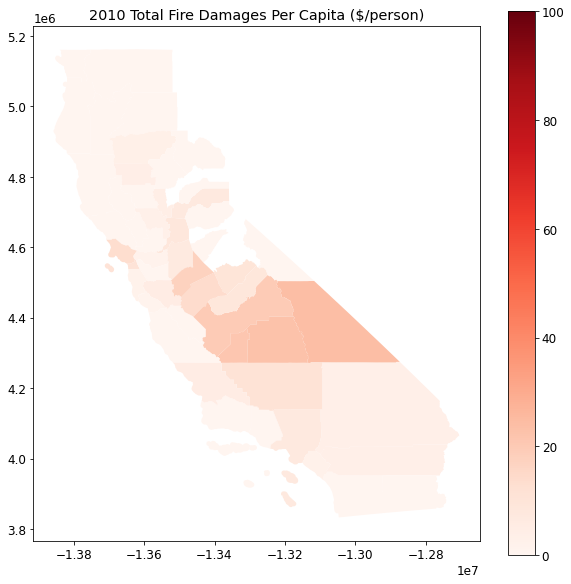

In [6]:
############### PRINT COUNTY AND SENSOR INFO ################
#model.print_county_info(PM_data, number_of_sensors)

###################### PLOT FIRE DAY ########################
#plt.rcParams['figure.figsize'] = [6,4]
#ax = model.plot_fire_days(["Alameda", "Los Angeles"], PM_data_fire_days)

######################## MAKE MAP ###########################
plt.rcParams['figure.figsize'] = [8,6]
if summary_level != "By County":
    print("Can only make map if results done By County")
else:
    if per_capita:
        model.make_map(damage_results.loc[:,"Total Fire"], "Total Fire Damages Per Capita ($/person)", 100)
    else:
        model.make_map(damage_results.loc[:,"Total Fire"], "Total Fire Damages ($M)")